In [1]:
from paddleocr import PaddleOCR
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
detector = PaddleOCR(
    det=True,
    rec=False,
    cls=False,
    show_log=False
)

In [3]:
ocr_en = PaddleOCR(lang="en", det=False, cls=False, show_log=False)
ocr_hi = PaddleOCR(lang="hi", det=False, cls=False, show_log=False)

In [4]:
REC_MAP = {
    "en": ocr_en,
    "hi": ocr_hi
}

In [5]:
def crop_line(image, box):
    pts = np.array(box).astype(int)
    x, y, w, h = cv2.boundingRect(pts)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY).astype("uint8")
    return image[y:y+h, x:x+w]

In [19]:
def recognize_line(line_img):
    result_en = None
    result_hi = None

    result_en = ocr_en.ocr(line_img, det=False, cls=False)
    result_hi = ocr_hi.ocr(line_img, det=False, cls=False)
    # print(result_en, result_hi)
    # return result
    if not result_en or not result_en[0] or not result_hi or not result_hi[0]:
        return {
            "text": "",
            "confidence": 0,
        }
    payload = result_en[0][0],result_hi[0][0]
    print(payload)

    text=""
    confidence=0
    for out in payload:
        print(out)
        if out[0] is not None:
            txt, conf = out
            if conf > confidence:
                text = txt
                confidence = conf

    return {
        "text": text,
        "confidence": float(confidence)
    }
    
    
        

In [15]:
image = cv2.imread("172589759_3_pg6.png")

In [16]:
det_result = detector.ocr(image, cls=False)

In [20]:
output = []
for line in det_result[0]:
    box = line[0]
    line_img = crop_line(image, box)

    rec = recognize_line(line_img)
    output.append({
        "bbox": box,
        "result": rec,
        "text": rec["text"],
        "confidence": rec["confidence"]
    })
len(output)

(('GSTIN22AFPFS6816N1ZC', 0.9918514490127563), ('GSTIN : 22AFPFS5B1GN1ZC', 0.8819199204444885))
('GSTIN22AFPFS6816N1ZC', 0.9918514490127563)
('GSTIN : 22AFPFS5B1GN1ZC', 0.8819199204444885)
(('Mob.9131178887,9399253083', 0.9491596817970276), ('Mob. 913178887, 9399253083', 0.9584553241729736))
('Mob.9131178887,9399253083', 0.9491596817970276)
('Mob. 913178887, 9399253083', 0.9584553241729736)
(('swaRaJ', 0.8759801983833313), ('SWaRa!', 0.7881549000740051))
('swaRaJ', 0.8759801983833313)
('SWaRa!', 0.7881549000740051)
(('Mahindra & Mahindra', 0.9436461925506592), ('Mahindra s Mahind?', 0.9127584099769592))
('Mahindra & Mahindra', 0.9436461925506592)
('Mahindra s Mahind?', 0.9127584099769592)
(('17', 0.9984441995620728), ('१८', 0.6258959770202637))
('17', 0.9984441995620728)
('१८', 0.6258959770202637)
(('fic2606|2', 0.6255234479904175), ('/', 0.9221265316009521))
('fic2606|2', 0.6255234479904175)
('/', 0.9221265316009521)
(('', 0.0), ('क़मांक', 0.9401230812072754))
('', 0.0)
('क़मांक', 0.940

63

In [21]:
output

[{'bbox': [[64.0, 22.0], [335.0, 22.0], [335.0, 43.0], [64.0, 43.0]],
  'result': {'text': 'GSTIN22AFPFS6816N1ZC', 'confidence': 0.9918514490127563},
  'text': 'GSTIN22AFPFS6816N1ZC',
  'confidence': 0.9918514490127563},
 {'bbox': [[835.0, 16.0], [1131.0, 15.0], [1131.0, 40.0], [835.0, 42.0]],
  'result': {'text': 'Mob. 913178887, 9399253083',
   'confidence': 0.9584553241729736},
  'text': 'Mob. 913178887, 9399253083',
  'confidence': 0.9584553241729736},
 {'bbox': [[67.0, 84.0], [236.0, 84.0], [236.0, 120.0], [67.0, 120.0]],
  'result': {'text': 'swaRaJ', 'confidence': 0.8759801983833313},
  'text': 'swaRaJ',
  'confidence': 0.8759801983833313},
 {'bbox': [[68.0, 124.0], [236.0, 124.0], [236.0, 145.0], [68.0, 145.0]],
  'result': {'text': 'Mahindra & Mahindra', 'confidence': 0.9436461925506592},
  'text': 'Mahindra & Mahindra',
  'confidence': 0.9436461925506592},
 {'bbox': [[193.0, 174.0], [245.0, 174.0], [245.0, 211.0], [193.0, 211.0]],
  'result': {'text': '17', 'confidence': 0.99

In [63]:
text, confidence = output[0]['result'][0][0]

In [61]:
text, confidence

('GSTIN22AFPFS6816N1ZC', 0.99140864610672)

In [24]:
for line in range(len(det_result[0])):
    x, y, w, h = cv2.boundingRect(np.array(det_result[0][line][0]).astype(int))
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)


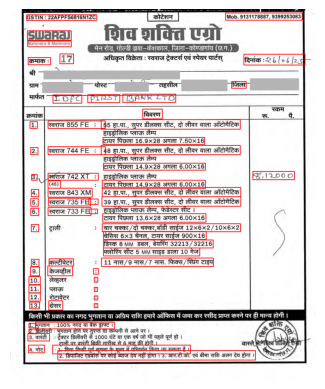

In [25]:
plt.imshow(image)
plt.axis("off")
plt.show()